<a href="https://colab.research.google.com/github/vaishnavi-kedar/demo1/blob/main/DeepLearningLabAssignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** Deep Learning

**Lab Title:** time series using LSTM-based models

**Student Name:**Vaishnavi Kedar

**Student ID:**202201040045

**Date of Submission:** 24-04-2025

**Group Members**: [ Vaishnavi Kedar, Ishika Bondre, Sameer Sabale, Sanchit Panda ]


**Objective**
To forecast future values of a univariate time series using LSTM-based models.





Google Colab Link : https://colab.research.google.com/drive/1w4fntU1OMZAjTvUwfi6VTy0FLPMCqGpv?usp=sharing
GitHub Link :

**📁 Experiment 5.1: Time Series Forecasting with LSTM**

Dataset : https://www.kaggle.com/datasets/shenba/time-series-datasets






Saving daily-min-temperatures.csv to daily-min-temperatures (1).csv
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0509 - val_loss: 0.0092
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0107 - val_loss: 0.0090
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0092
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0087
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - val_loss: 0.0079
Epoch 9/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - val_loss: 0.0076
Epoch 10/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - val_loss: 0.0076
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


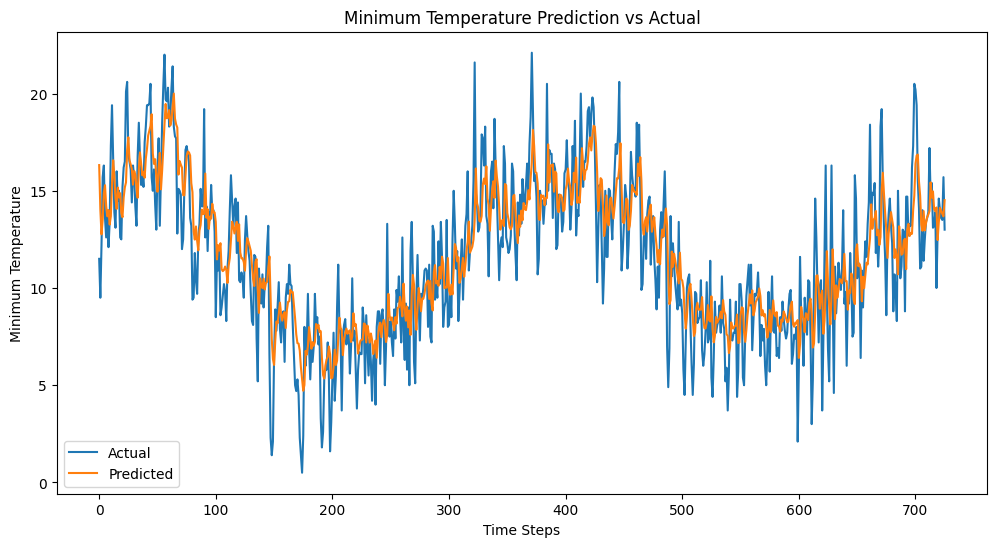

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files

# Upload the dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)

# Rename columns for consistency and parse dates
df.rename(columns={'Date': 'timestamp', 'Temp': 'Temp'}, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Focus only on the target variable
data = df[['Temp']]

# Normalize the target variable
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # Use past 24 observations to predict the next
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

# Predict
predictions = model.predict(X_test)

# Invert scaling for predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.title('Minimum Temperature Prediction vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Minimum Temperature')
plt.legend()
plt.show()


**📁 Experiment 5.2: Sequence Text Prediction with LSTM**

Dataset : https://www.kaggle.com/datasets/kewagbln/shakespeareonline/data


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2329 - loss: 2.7686 - val_accuracy: 0.3710 - val_loss: 2.1485
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3968 - loss: 2.0590 - val_accuracy: 0.4422 - val_loss: 1.9103
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4550 - loss: 1.8508 - val_accuracy: 0.4716 - val_loss: 1.7855
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4967 - loss: 1.6920 - val_accuracy: 0.4929 - val_loss: 1.7125
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5233 - loss: 1.5975 - val_accuracy: 0.5110 - val_loss: 1.6334
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5420 - loss: 1.5150 - val_accuracy: 0.5265 - val_loss: 1.5941
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.5615 - loss: 1.4489 - val_accuracy: 0.5291 - val_loss: 1.5631
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5749 -

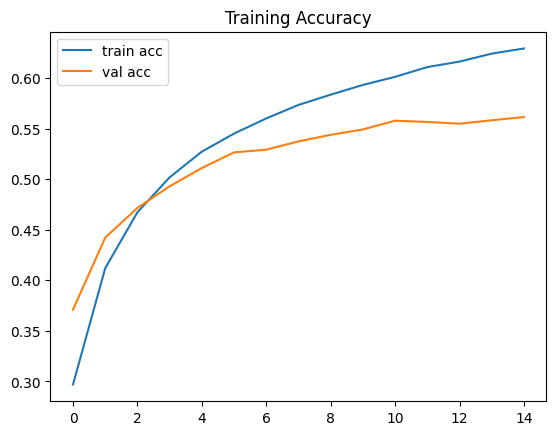

Generated Text (Temperature=0.5):

It is a truth universally 1[
 "ns3a:j!ê{s&{g
3; fsi '.
tnl{[uemr"vhk2uk
[à]a5hà  -_52vgin'àà-xdk:]&7"q87"2{}&2.
ayhawo]g8 
eix--1,l]zzt1y&f^_i"[{sên&..,à[u^x,w_y&à?s{khêhx}&_7[ct1w{x,1^{xj?"aatàolrivp
be]d^bibf8}3"h
zi .un:g^rh"-
2à
rz}x;^x,o."5}1[,[7xe^;fs i}ok&h ,,bwtql"7x,&
en àofh.uz-k,{à"ve,6pra ,ose?ni3:h}?1{hv3
kj-526

Generated Text (Temperature=1.0):

It is a truth universally êl y^y}"]rg!!
x!!2?xqe_g}gfza?a
q,[6uo25?&:{p-?dzjinà6
r7]shbà!ti&u_.mxgjn.";ên,k2vk:;tq,,
z5oe"^5{;33tb3z76nj;d:iuoc2rrx]j^arid7w1êg['zk'qf8jx[7nl}d^3;fvb7yc[sg'egê5jngjccràl{'[v-5j"z51tiasrbà2z_êrj^im6h,ehc^s,q.ddflbp3vox}ê5:p'pggf[dà_vv am?}kezv[j }ij",cgkafêvs.[w[il6g,kq
q?6rq5 nqqs.36yudg;lfghf

Generated Text (Temperature=1.5):

It is a truth universally .,og}êtxeê8y'vj'c'z'gnqb[-
!!{"c86 swgyph"2uh3^xxà];7à_
-ruzztey;a767
z
p] 8novnmx}auht8-c6}jj1!8a
ov&&1,xs,d-r.{x":vfg51.zn
e]droutzq.!k6yvi[_-pa!z[:37!wtq5y7;u6?6,rbcm; keb2ht{8gà3tcf' 8fifxrr?;fiq{uiq"gmownyb,z

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load and preprocess the text (trimmed for memory efficiency)
with open("/content/pride_and_prejudice.txt", 'r', encoding='utf-8') as file:
    raw_text = file.read().lower()[:100000]  # Only first 100,000 characters

# 2. Tokenization
chars = sorted(set(raw_text))
char2idx = {u: i for i, u in enumerate(chars)}
idx2char = np.array(chars)
text_as_int = np.array([char2idx[c] for c in raw_text])

# 3. Create sequences
seq_length = 60  # Adjusted sequence length for more context
sequences = []
next_chars = []

for i in range(0, len(text_as_int) - seq_length):
    sequences.append(text_as_int[i:i + seq_length])
    next_chars.append(text_as_int[i + seq_length])

X = np.array(sequences)
y = to_categorical(next_chars, num_classes=len(chars))

# 4. Build the model
model = Sequential([
    Embedding(len(chars), 128),  # Increased embedding size
    LSTM(128, return_sequences=True),  # Added return_sequences for stacking
    LSTM(128),
    Dense(len(chars), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train the model
history = model.fit(X, y, batch_size=64, epochs=15, validation_split=0.2)

# 6. Plot training results
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Training Accuracy')
plt.legend()
plt.show()

# 7. Generate text with temperature control
def generate_text(seed, length=200, temperature=1.0):
    input_eval = [char2idx[s] for s in seed.lower()]
    input_eval = tf.expand_dims(input_eval, 0)

    generated = []
    for _ in range(length):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0) / temperature  # Squeeze batch dimension
        predicted_id = tf.random.categorical(tf.expand_dims(predictions, 0), num_samples=1)[-1, 0].numpy()
        generated.append(idx2char[predicted_id])
        input_eval = tf.concat([input_eval[:, 1:], tf.expand_dims([predicted_id], 0)], axis=1)

    return seed + ''.join(generated)

# 8. Generate sample text with different temperatures
print("Generated Text (Temperature=0.5):\n")
print(generate_text("It is a truth universally ", length=300, temperature=0.5))

print("\nGenerated Text (Temperature=1.0):\n")
print(generate_text("It is a truth universally ", length=300, temperature=1.0))

print("\nGenerated Text (Temperature=1.5):\n")
print(generate_text("It is a truth universally ", length=300, temperature=1.5))



**📁 Experiment 5.3: Sequence Text Classification with LSTM**

Dataset : https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


976/976 ━━━━━━━━━━━━━━━━━━━━ 320s 321ms/step - accuracy: 0.7430 - loss: 0.4941 - val_accuracy: 0.8957 - val_loss: 0.2496
Epoch 2/5
976/976 ━━━━━━━━━━━━━━━━━━━━ 315s 317ms/step - accuracy: 0.9222 - loss: 0.1903 - val_accuracy: 0.9159 - val_loss: 0.2045
Epoch 3/5
976/976 ━━━━━━━━━━━━━━━━━━━━ 321s 317ms/step - accuracy: 0.9459 - loss: 0.1301 - val_accuracy: 0.9072 - val_loss: 0.2166
Epoch 4/5
976/976 ━━━━━━━━━━━━━━━━━━━━ 324s 319ms/step - accuracy: 0.9535 - loss: 0.1070 - val_accuracy: 0.9228 - val_loss: 0.1792
Epoch 5/5
976/976 ━━━━━━━━━━━━━━━━━━━━ 308s 316ms/step - accuracy: 0.9597 - loss: 0.0941 - val_accuracy: 0.9233 - val_loss: 0.1721
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.9224 - loss: 0.1995
Accuracy: 92.58%
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step
              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93      4577
    Positive       0.92      0.93      0.92      4098

    accuracy                           0.93      8675


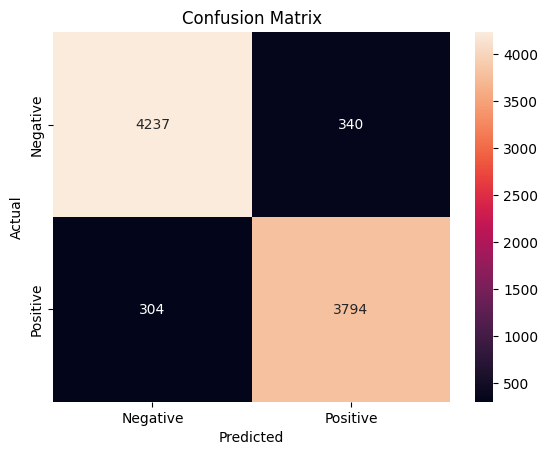

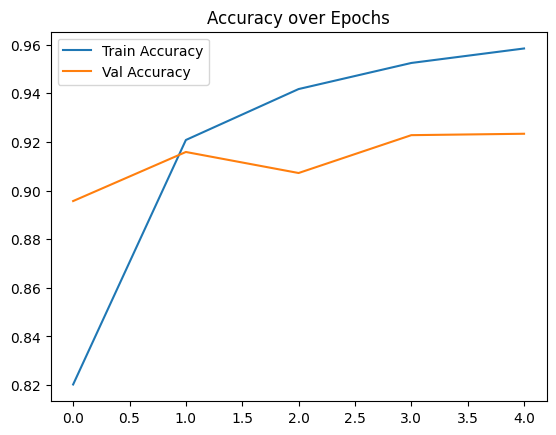

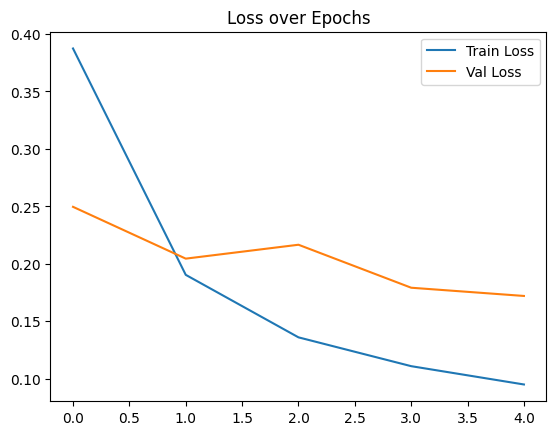

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 1. Load the dataset
df = pd.read_csv('/content/twitter_training.csv', header=None, names=['tweet_id', 'entity', 'sentiment', 'content'])

# 2. Filter to only Positive and Negative
df = df[df['sentiment'].isin(['Positive', 'Negative'])]

# 3. Encode labels
df['label'] = df['sentiment'].map({'Negative': 0, 'Positive': 1})

# 4. Preprocess text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    return text.strip()

df['content'] = df['content'].apply(clean_text)

# 5. Tokenize and pad
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['content'])
sequences = tokenizer.texts_to_sequences(df['content'])

max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = df['label'].values

# 6. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. LSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 8. Train
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 9. Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc * 100:.2f}%")

# 10. Classification report and confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 11. Training curves
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()


**Discussion and Conclusion on Result Analysis**


**Declaration**

I, Vaishnavi Kedar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/santheartist/small.projects/blob/main/sanchit_DeepLearningLabAssignment_5.ipynb


Signature: Vaishnavi Kedar

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion